The aim of this nb is to explore the data to get a feel for what states are contained in it.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:

states = np.load("Data/DemoStates.npy")
actions = np.load("Data/DemoActions.npy")

print(f"Data loaded, states: {states.shape}, Actions, {actions.shape}")



Data loaded, states: (2696, 5), Actions, (845, 2)


Max: 0.8104026448036742
Mean: 0.0572618992636331


(array([346.,  99., 172., 225., 303., 188., 149., 131., 103.,  65.,  53.,
         38.,  28.,  24.,  15.,  13.,   9.,   8.,   6.]),
 array([0.        , 0.01052632, 0.02105263, 0.03157895, 0.04210526,
        0.05263158, 0.06315789, 0.07368421, 0.08421053, 0.09473684,
        0.10526316, 0.11578947, 0.12631579, 0.13684211, 0.14736842,
        0.15789474, 0.16842105, 0.17894737, 0.18947368, 0.2       ]),
 <BarContainer object of 19 artists>)

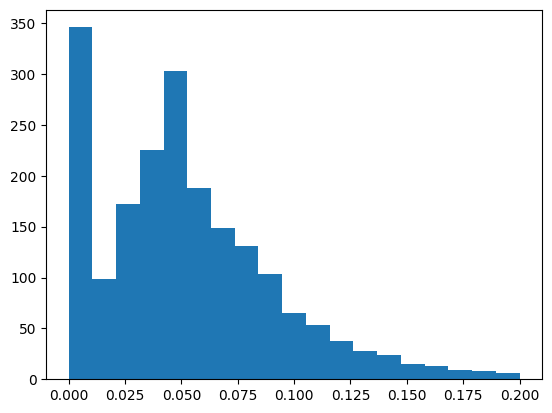

In [11]:
move_states = states[np.where(states[:, 4] > 0.1)]

dp = move_states[1:, :2] - move_states[:-1, :2]
# dp = states[1:, :2] - states[:-1, :2]
ds = np.linalg.norm(dp, axis=1)

print(f"Max: {np.max(ds)}")
print(f"Mean: {np.mean(ds)}")

bins = np.linspace(0, 0.2, 20)
plt.hist(ds, bins=bins)

(array([ 25.,  17.,  18.,   9.,  21.,  93., 422., 264., 199., 173., 187.,
        185.,  93.,  36.,  39.,  39.,  39.,  39.,  38.,  84.]),
 array([0.15044643, 0.60201506, 1.0535837 , 1.50515234, 1.95672098,
        2.40828962, 2.85985826, 3.3114269 , 3.76299554, 4.21456418,
        4.66613282, 5.11770146, 5.5692701 , 6.02083873, 6.47240737,
        6.92397601, 7.37554465, 7.82711329, 8.27868193, 8.73025057,
        9.18181921]),
 <BarContainer object of 20 artists>)

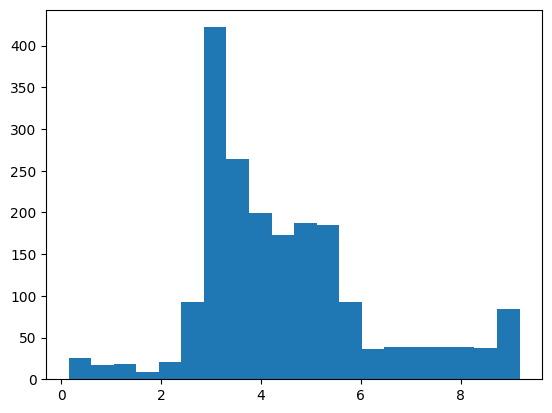

In [15]:
vs = states[:, 4]
new_vs = states[np.where(vs > 0.1)]
new_vs = new_vs[:, 4]

# plt.hist(vs, bins=20)
plt.hist(new_vs, bins=20)

This graph shows an interesting fact
- For a large part, the vehicle is stationary, these states must be removed
- My guess is that this is why there are so many states for the actions.
- The frequency may be slower, it is just stationary.




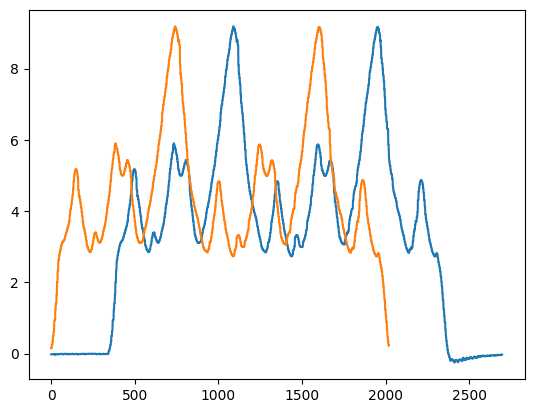

In [16]:
plt.plot(vs)
plt.plot(new_vs)

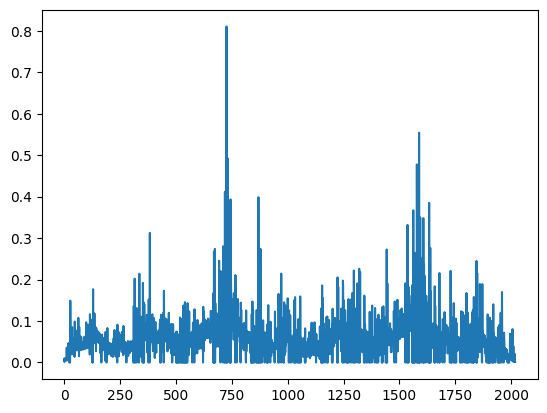

In [17]:
plt.plot(ds)